In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

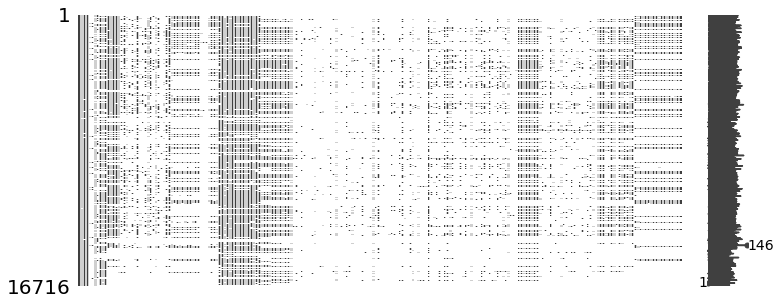

In [2]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('kaggle-survey-2017/multipleChoiceResponses.csv', encoding="ISO-8859-1")

# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

## Q1. 어떤 언어를 배워야??

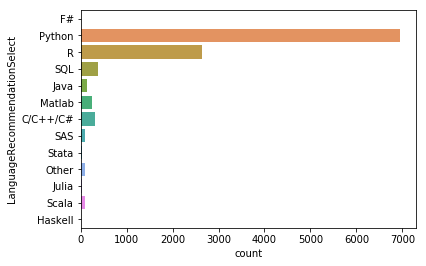

In [3]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

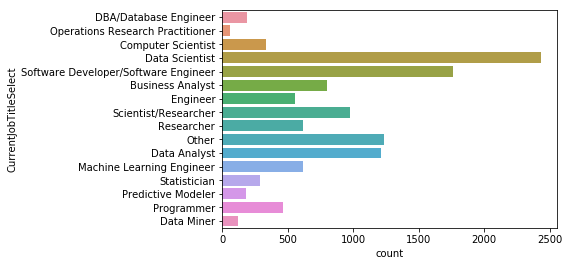

In [4]:
# 현재 하고 있는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [5]:
# 현재 하는 일에 대한 전체 응답 수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

In [6]:
# 현재 하는 일에 대해 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & 
           ((mcq['LanguageRecommendationSelect']=='Python') | 
           (mcq['LanguageRecommendationSelect']=='R'))]
print(data.shape)

(7158, 228)


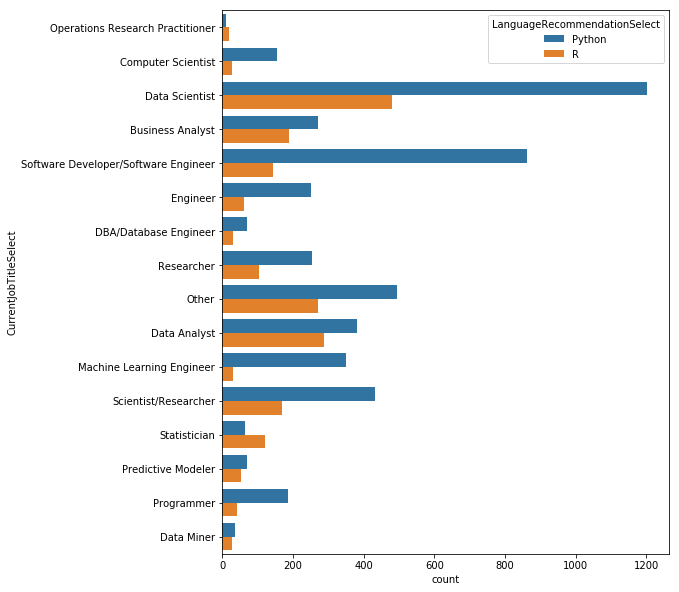

In [7]:
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', 
             hue='LanguageRecommendationSelect',
             data=data)

## Q2. 데이터 사이언스에서 앞으로 크게 주목될만한 것은?

In [8]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent,
                                   left_index=True, right_index=True).head(20)
mcq_ml_df.columns = ['응답 수', '비율']
mcq_ml_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


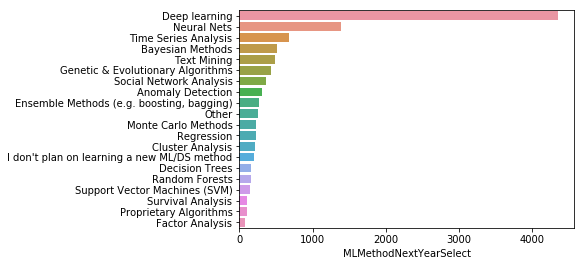

In [10]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

## 어디에서 배워야하는가

In [11]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

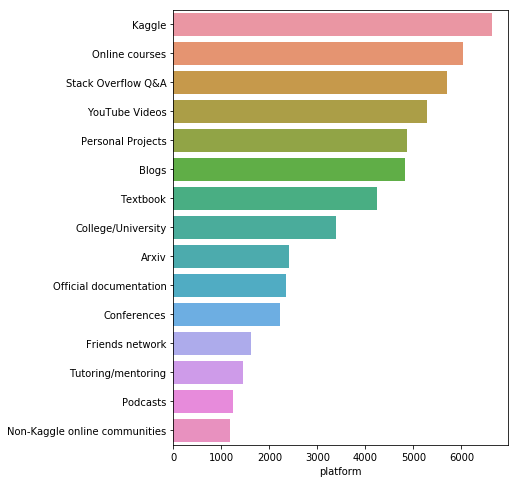

In [12]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [13]:
# 설문 내용을 누구에게 물어봤는지
question = pd.read_csv('kaggle-survey-2017/schema.csv')
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [14]:
# 유용함
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

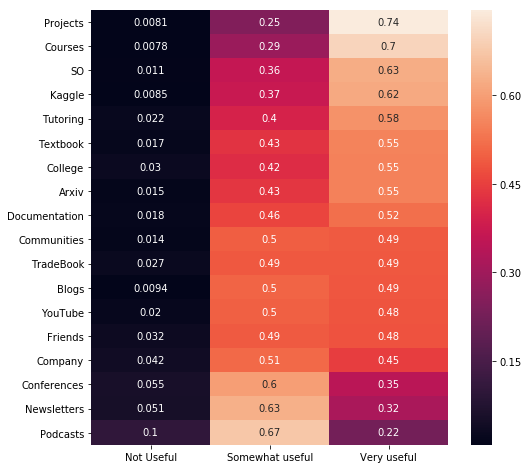

In [15]:
# 학습 플랫폼과 유용함에 대한 연관성
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a
    
fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

# 학습 플랫폼이 얼마나 유용한지 상관관계 그림
plt.figure(figsize=(8,8))
sns.heatmap(fdf.sort_values('Very useful', ascending=False), annot=True)

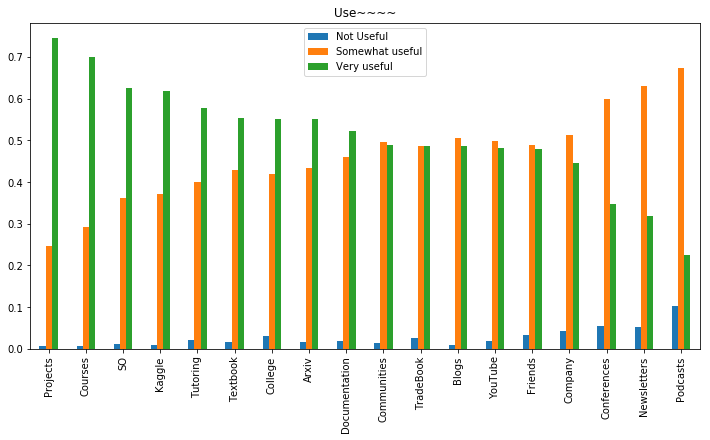

In [16]:
# 플랫폼 별 그룹화
fdf.plot(kind='bar', figsize=(12,6), title='Use~~~~')

In [17]:
# 파이차트 그리기

cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [18]:
cdf = {}
for feature in cat_features:
 cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이 차트 그리기 위해 평균값을 구하고 담아준다
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

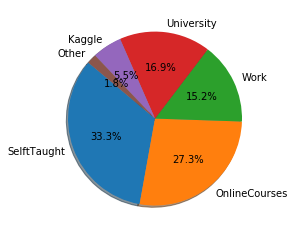

In [19]:
plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

## 데이터 사이언스위해 고사양 컴퓨터 필요?

In [21]:
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [22]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
 'HardwarePersonalProjectsSelect'].shape

(4206,)

In [23]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x:
 pd.Series(x['HardwarePersonalProjectsSelect']),
 axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [24]:
s = s[s != 'nan']
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
Laptop + Cloud service (AWS,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


## 얼마나 많은 시간 할애?

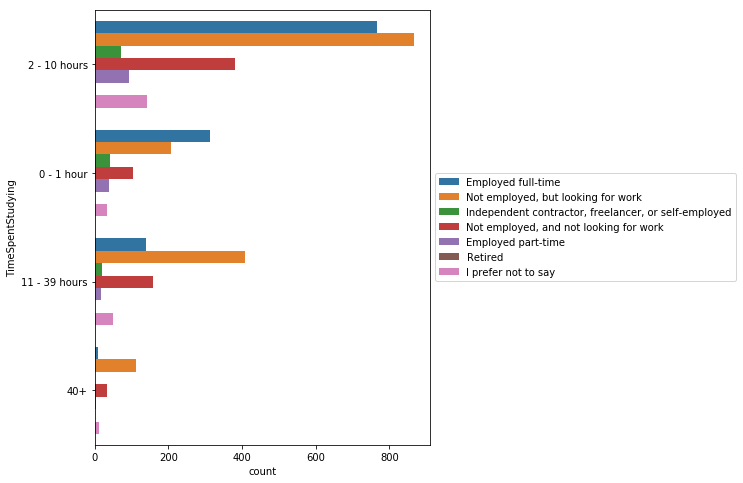

In [25]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying',
 data=mcq,
 hue='EmploymentStatus'
 ).legend(loc='center left',
 bbox_to_anchor=(1, 0.5))

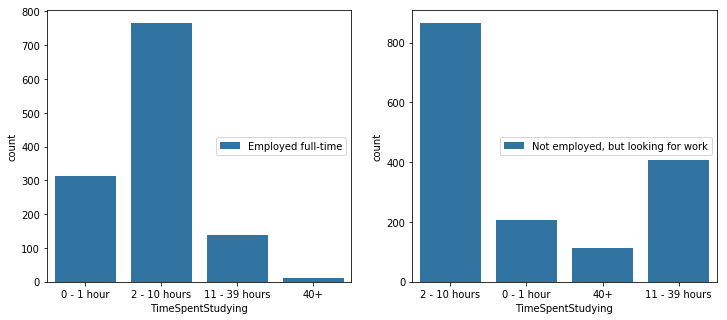

In [27]:
full_time = mcq.loc[(mcq['EmploymentStatus']=='Employed full-time')]
looking_for_job = mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]

figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,5)

sns.countplot(x='TimeSpentStudying',
 data=full_time,
 hue='EmploymentStatus', ax=ax1
 ).legend(loc='center right',
 bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying',
 data=looking_for_job,
 hue='EmploymentStatus', ax=ax2
 ).legend(loc='center right',
 bbox_to_anchor=(1, 0.5))

## 블로그, 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?

In [28]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [29]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
 axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

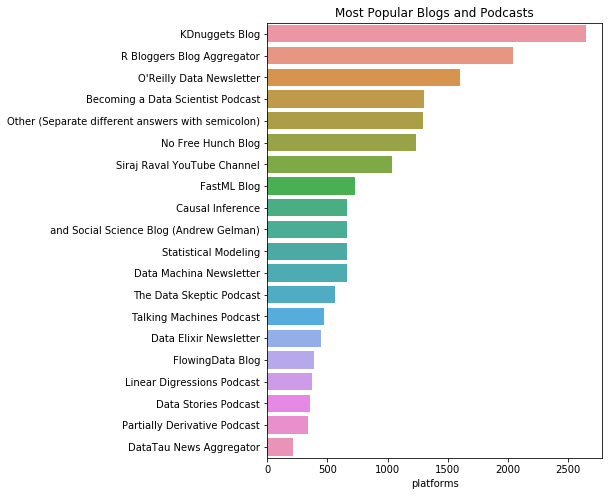

In [30]:
s = s[s != 'nan'].value_counts().head(20)
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

In [31]:
# 인기 있는 코스 플랫폼
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [32]:
t = mcq.apply(lambda x:pd.Series(x['CoursePlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
t.name = 'courses'
t.head(10)

0         nan
1         nan
2    Coursera
2         edX
3         nan
4         nan
5         nan
6         nan
7    Coursera
8         nan
Name: courses, dtype: object

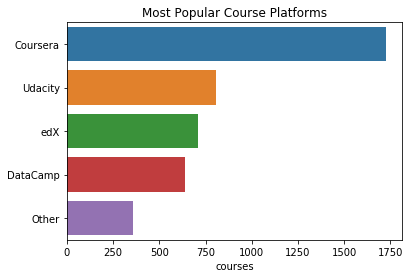

In [33]:
t = t[t != 'nan'].value_counts()
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)

# 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [34]:
job_features = [
    x for x in mcq.columns if x.find(
    'JobSkillImportance') != -1
    and x.find('JobSkillImportanceOther') == -1 
]
job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [35]:
jdf = {}
for feature in job_features:
 a = mcq[feature].value_counts()
 a = a/a.sum()
 jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

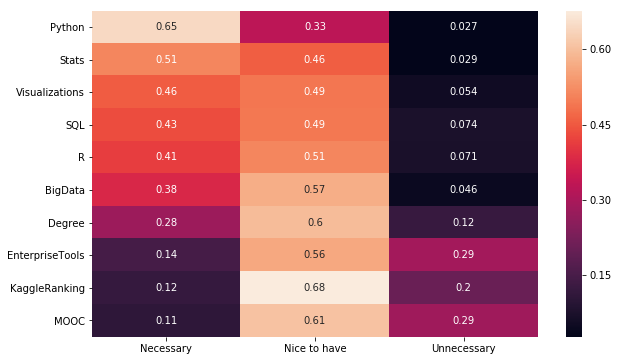

In [37]:
# 히트맵 그려주기 위해 행렬 변경
jdf = pd.DataFrame(jdf).transpose()

plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary",
 ascending=False), annot=True)

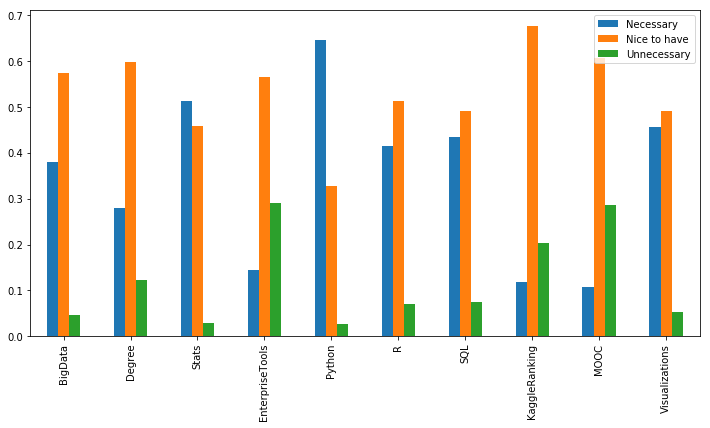

In [38]:
jdf.plot(kind='bar', figsize=(12,6))

## Q8. 데이터 과학자의 평균 급여는 얼마나 될까?

In [39]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [40]:
mcq[mcq['CompensationAmount'].notnull()].head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Male,Taiwan,26.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
mcq['CompensationAmount'] = mcq[
 'CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq[
 'CompensationAmount'].str.replace('-','')

# 환율 계산 위한 정보 가져오기
rates = pd.read_csv('kaggle-survey-2017//conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

# 달러화로 계산된 salary라는 열을 merge
salary = mcq[ ['CompensationAmount','CompensationCurrency',
               'GenderSelect',
               'Country',
               'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates,left_on='CompensationCurrency', right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [43]:
print('Maximum Salary is USD $',
 salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
 salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
 salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

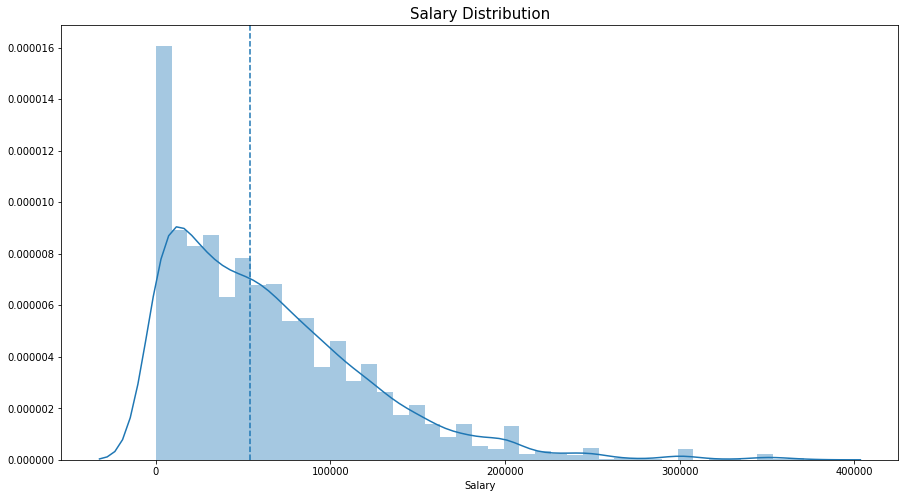

In [45]:
plt.subplots(figsize=(15,8))
# 40만 달러 미만
salary = salary[salary['Salary'] < 400000]
sns.distplot(salary['Salary'])
# 중앙값에 선을 그음
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution',size=15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

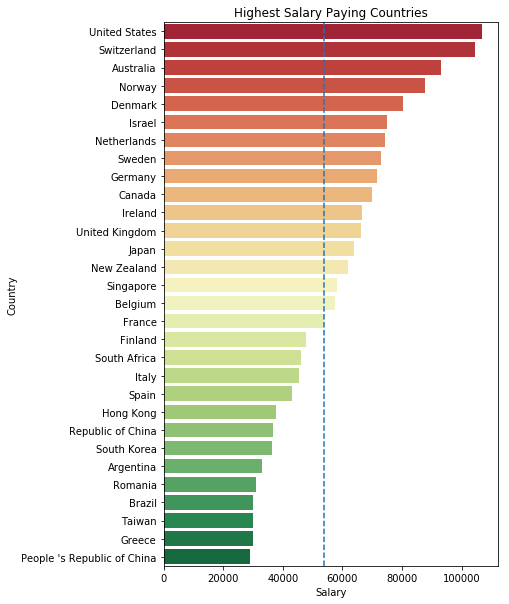

In [46]:
# 국가별로 묶음
plt.subplots(figsize=(6,10))

sal_coun = salary.groupby(
 'Country')['Salary'].median().sort_values(
 ascending=False)[:30].to_frame()

sns.barplot('Salary',
 sal_coun.index,
 data = sal_coun,
 palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

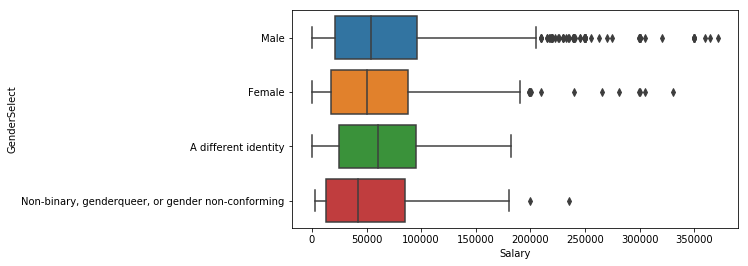

In [47]:
# 현재 salary는 40만 달러 미만
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary', data=salary)

In [48]:
salary_korea = salary.loc[(salary['Country']=='South Korea')]
salary_korea.shape

(26, 8)

In [49]:
salary_korea_male = salary_korea[salary_korea['GenderSelect']== 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

## 개인 프로젝트나 학습용 데이터를 어디에서 얻나요?

In [50]:
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))

In [51]:
q = mcq.apply(
 lambda x: pd.Series(x['PublicDatasetsSelect']),
 axis=1).stack().reset_index(level=1, drop=True)

q.name = 'courses'

q = q[q != 'nan'].value_counts()

In [52]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


In [53]:
# 주관식 응답 읽어오기
ff = pd.read_csv('kaggle-survey-2017/freeformResponses.csv', encoding="ISO-8859-1")
ff.shape

(16716, 62)

In [54]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
 'Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [55]:
# 공개 데이터셋 다룰때 어려운 점은?
ppcff = ff[
 'PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
Size,9
-,9


## Q10. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?

In [56]:
time_features = [
    x for x in mcq.columns if x.find('Time') != -1][4:10]

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64


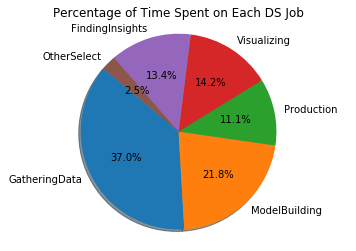

In [58]:
# 파이 차트로 도식

tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)

plt.pie(tdf, labels=tdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()